# 한국소비자원 소비자 피해구제 정보 시각화

이 프로젝트는 **한국소비자원**의 소비자 피해구제 정보를 시각화하는 프로젝트입니다. 소비자 피해와 관련된 데이터 분석을 통해 다양한 통찰을 제공하고자 합니다.

### 데이터 출처
- **출처**: [공공데이터포털 - 한국소비자원 소비자 피해구제 정보](https://www.data.go.kr/data/3040720/fileData.do)
* 2023년 1월 ~ 2024년 12월까지의 데이터

### 분석 목표
이 프로젝트의 주요 목표는 두 가지입니다:
1. **소비자 피해구제의 나이 분포** 분석
2. **청구 이유**에 대한 분포 분석

### 분석 과정
1. **데이터 수집**: 공공데이터포털에서 제공하는 데이터를 다운로드하여 사용.
2. **데이터 전처리**: 결측치 처리, 데이터 정제 등을 통해 분석 가능한 형태로 변환.
3. **분석**:
   - 나이별 소비자 피해구제 분포 시각화
   - 청구 이유별 피해구제 분포 시각화
4. **결과 시각화**: 분석 결과를 시각적으로 표현하여 이해하기 쉽게 제공합니다.

### 사용된 기술
- Python
- pandas, numpy, matplotlib, seaborn

### 프로젝트 실행 방법
1. 레포지토리를 클론한 후, 필요한 라이브러리를 설치합니다.
   ```bash
   pip install -r requirements.txt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#한글 포트 설정
import os
if os.name=='posix':
    plt.rc("font", family = 'AppleGothic')
else:
    plt.rc("font", family = "Malgun Gothic")

In [13]:
folder_path = '한국소비자원_소비자_피해규제'

# 폴더 내 파일 리스트 확인
csv_files = [f for f in os.listdir(folder_path) if '소비자원' in f and f.endswith('.csv')]

print("선택된 CSV 파일 목록:", csv_files)

선택된 CSV 파일 목록: ['한국소비자원 소비자 피해구제 데이터 2023년 1분기.csv', '한국소비자원 소비자 피해구제 데이터 2023년 2분기.csv', '한국소비자원 소비자 피해구제 데이터 2023년 3분기.csv', '한국소비자원 소비자 피해구제 데이터 2023년 4분기.csv', '한국소비자원 소비자 피해구제 데이터 2024년 1분기.csv', '한국소비자원 소비자 피해구제 데이터 2024년 2분기.csv', '한국소비자원 소비자 피해구제 데이터 2024년 3분기.csv', '한국소비자원 소비자 피해구제 정보_20241231.csv']


In [17]:
df_list = [pd.read_csv(os.path.join(folder_path, file), encoding='cp949') for file in csv_files]
combined_df = pd.concat(df_list, ignore_index=True)

combined_df.to_csv('combined_data.csv', index=False, encoding='cp949')

In [19]:
df = pd.read_csv("combined_data.csv", encoding="cp949")

In [22]:
df.head()

,사건번호,접수일(년월일),성별,연령대,지역,판매유형,물품소분류,청구이유
0,2023000101,2023-01-02,여자,50 - 59세,대전광역시,방문판매,헬스장,계약해제.해지/위약금
1,2023000102,2023-01-02,남자,40 - 49세,대구광역시,기타,양복(서양식 의복)세탁,품질(물품/용역)
2,2023000103,2023-01-02,여자,40 - 49세,경상남도,일반판매,양복(서양식 의복)세탁,품질(물품/용역)
3,2023000104,2023-01-02,여자,60 - 64세,인천광역시,일반판매,니트(스웨터),품질(물품/용역)
4,2023000106,2023-01-02,여자,50 - 59세,인천광역시,일반판매,양복(서양식 의복)세탁,품질(물품/용역)


In [23]:
df.shape

(105654, 8)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105654 entries, 0 to 105653
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   사건번호      105654 non-null  int64 
 1   접수일(년월일)  105654 non-null  object
 2   성별        105654 non-null  object
 3   연령대       105654 non-null  object
 4   지역        105653 non-null  object
 5   판매유형      105643 non-null  object
 6   물품소분류     105648 non-null  object
 7   청구이유      105612 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.4+ MB


In [26]:
df.isnull().sum()

사건번호         0
접수일(년월일)     0
성별           0
연령대          0
지역           1
판매유형        11
물품소분류        6
청구이유        42
dtype: int64

지역 1, 판매유형 11, 물품소분류 6, 청구이유 42 의 결측치 발견

In [35]:
df.groupby('성별')['청구이유'].count().sort_values()

성별
남자    47122
여자    58490
Name: 청구이유, dtype: int64

여자가 남자보다 100000명 더 많은 것으로 확인
여성이 남자보다 많은 청구를 했음

In [27]:
df.groupby('연령대').count()['성별']

연령대
(미입력)         126
10 - 19세      711
10세 미만        111
20 - 29세    18522
30 - 39세    33754
40 - 49세    25502
50 - 59세    14856
60 - 64세     4637
65 - 69세     2832
70 - 79세     2110
80세이상         507
불명           1986
Name: 성별, dtype: int64

In [28]:
df.groupby('연령대').count()['성별'].sort_values(ascending=False)

연령대
30 - 39세    33754
40 - 49세    25502
20 - 29세    18522
50 - 59세    14856
60 - 64세     4637
65 - 69세     2832
70 - 79세     2110
불명           1986
10 - 19세      711
80세이상         507
(미입력)         126
10세 미만        111
Name: 성별, dtype: int64

30~39세가 사건 접수가 가장 많고, **10세 미만이나 (미입력) 값이랑 불명이라는 값이 동시에 존재 **

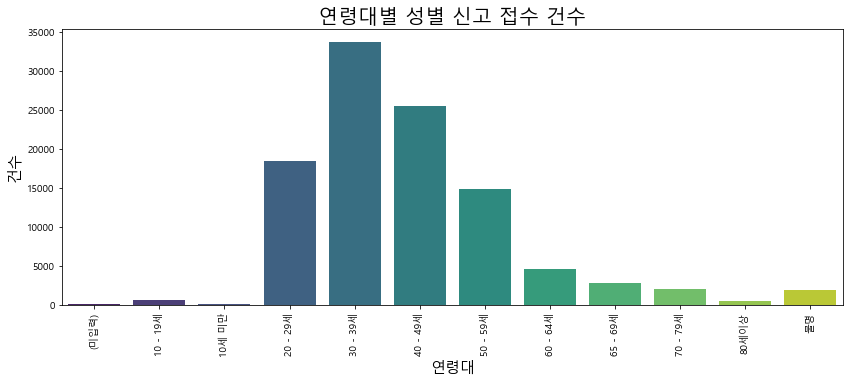

In [31]:
# 연령대별 성별 개수 데이터프레임 생성
age = pd.DataFrame(df.groupby('연령대')['성별'].count()) 
plt.figure(figsize=(14, 8)) 
# 바 플롯 그리기
sns.barplot(x=age.index, y=age['성별'], palette='viridis')

# 제목 및 라벨 추가
plt.title('연령대별 성별 신고 접수 건수', fontsize=20)
plt.xlabel('연령대', fontsize=15)
plt.ylabel('건수', fontsize=15)

plt.xticks(ticks=range(len(age.index)), labels=age.index, rotation=90, ha='center')
plt.subplots_adjust(bottom=0.4)
# 그래프 출력
plt.show()

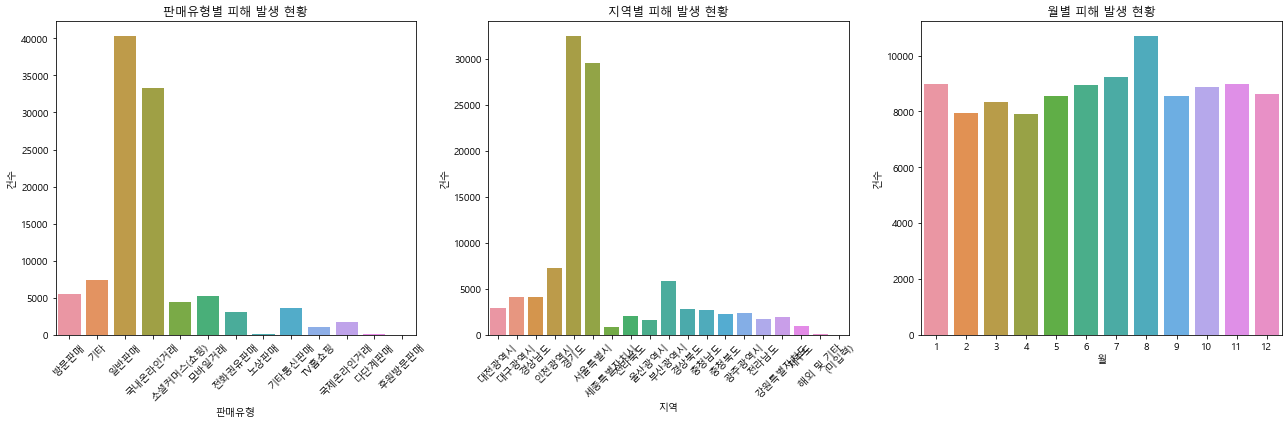

In [33]:
# 전체 그래프 크기 설정
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1행 3열의 서브플롯 생성

# 1. 판매유형별 피해 발생 현황
sns.countplot(data=df, x='판매유형', ax=axes[0])
axes[0].set_title('판매유형별 피해 발생 현황')
axes[0].set_xlabel('판매유형')
axes[0].set_ylabel('건수')
axes[0].tick_params(axis='x', rotation=45)

# 2. 지역별 피해 발생 현황
sns.countplot(data=df, x='지역', ax=axes[1])  
axes[1].set_title('지역별 피해 발생 현황')
axes[1].set_xlabel('지역')
axes[1].set_ylabel('건수')
axes[1].tick_params(axis='x', rotation=45)

# 3. 월별 피해 발생 현황
df['접수일'] = pd.to_datetime(df['접수일(년월일)'], errors='coerce')  
df['월'] = df['접수일'].dt.month
sns.countplot(data=df, x='월', ax=axes[2])
axes[2].set_title('월별 피해 발생 현황')
axes[2].set_xlabel('월')
axes[2].set_ylabel('건수')

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

1. 판매유형에선 일반판매, 국내온라인거래가 압도적으로 많음
2. 지역별에서는 경기도, 서울, 인천순으로 인구수의 비례에서 높음
3. 월초인 1월과 8월에 피해 발생이 많음

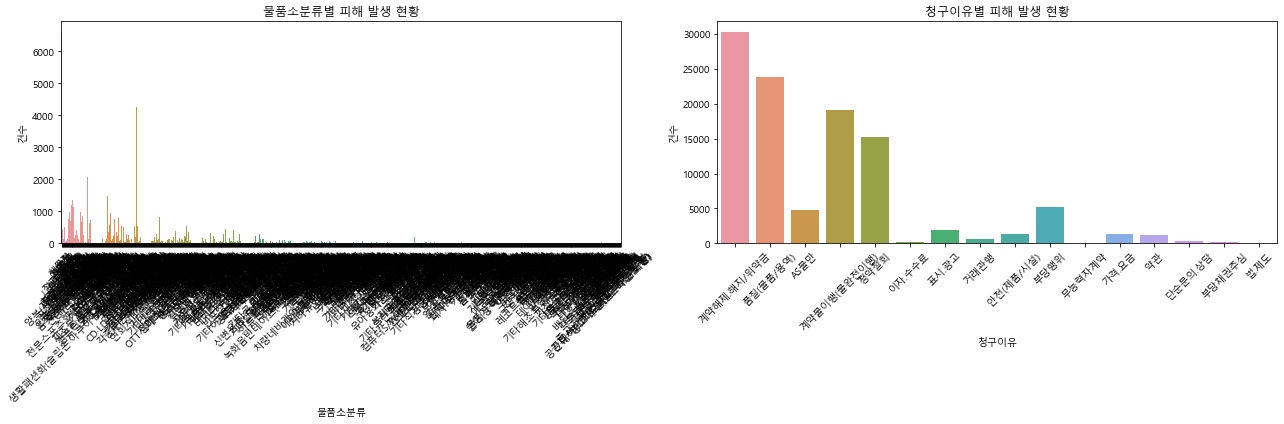

In [39]:
# 전체 그래프 크기 설정
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  

# 1. 판매유형별 피해 발생 현황
sns.countplot(data=df, x='물품소분류', ax=axes[0])
axes[0].set_title('물품소분류별 피해 발생 현황')
axes[0].set_xlabel('물품소분류')
axes[0].set_ylabel('건수')
axes[0].tick_params(axis='x', rotation=45)

# 2. 지역별 피해 발생 현황
sns.countplot(data=df, x='청구이유', ax=axes[1])  
axes[1].set_title('청구이유별 피해 발생 현황')
axes[1].set_xlabel('청구이유')
axes[1].set_ylabel('건수')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


물품소분류는 항목이 많아 알아보기 힘듦
청구이유는 계약해제/위약금, 품질(물품/용역), 계약불이행 순으로 많은 것을 알 수 있다.

In [37]:
df.head()

,사건번호,접수일(년월일),성별,연령대,지역,판매유형,물품소분류,청구이유,접수일,월
0,2023000101,2023-01-02,여자,50 - 59세,대전광역시,방문판매,헬스장,계약해제.해지/위약금,2023-01-02,1
1,2023000102,2023-01-02,남자,40 - 49세,대구광역시,기타,양복(서양식 의복)세탁,품질(물품/용역),2023-01-02,1
2,2023000103,2023-01-02,여자,40 - 49세,경상남도,일반판매,양복(서양식 의복)세탁,품질(물품/용역),2023-01-02,1
3,2023000104,2023-01-02,여자,60 - 64세,인천광역시,일반판매,니트(스웨터),품질(물품/용역),2023-01-02,1
4,2023000106,2023-01-02,여자,50 - 59세,인천광역시,일반판매,양복(서양식 의복)세탁,품질(물품/용역),2023-01-02,1


In [44]:
df.groupby('물품소분류').count()['성별'].sort_values(ascending=False).head(15)

물품소분류
헬스장             6601
항공여객운송서비스       4244
필라테스            2065
양복(서양식 의복)세탁    1916
인터넷교육서비스        1862
국외여행            1782
이동전화서비스         1598
점퍼·재킷류          1571
기타숙박시설          1488
호텔              1486
운동화             1367
스마트폰            1242
포장이사운송서비스       1199
기타의류·섬유         1136
신유형상품권          1055
Name: 성별, dtype: int64

In [52]:
df[df['물품소분류'] == '항공여객운송서비스'][['물품소분류', '청구이유']]

,물품소분류,청구이유
348,항공여객운송서비스,계약해제.해지/위약금
437,항공여객운송서비스,이자.수수료
456,항공여객운송서비스,계약불이행(불완전이행)
459,항공여객운송서비스,계약해제.해지/위약금
462,항공여객운송서비스,계약불이행(불완전이행)
...,...,...
105612,항공여객운송서비스,청약철회
105626,항공여객운송서비스,계약해제.해지/위약금
105641,항공여객운송서비스,계약해제.해지/위약금
105645,항공여객운송서비스,청약철회


In [53]:
df[df['물품소분류'] == '항공여객운송서비스']['청구이유'].value_counts()

계약해제.해지/위약금     1524
계약불이행(불완전이행)    1214
청약철회             833
부당행위             243
품질(물품/용역)        154
가격.요금             93
표시.광고             49
이자.수수료            39
거래관행              35
안전(제품/시설)         16
AS불만              15
약관                13
단순문의.상담            7
법.제도               5
부당채권추심             3
무능력자계약             1
Name: 청구이유, dtype: int64

In [55]:
df[df['물품소분류'] == '양복(서양식 의복)세탁'][['물품소분류', '청구이유']]

,물품소분류,청구이유
1,양복(서양식 의복)세탁,품질(물품/용역)
2,양복(서양식 의복)세탁,품질(물품/용역)
4,양복(서양식 의복)세탁,품질(물품/용역)
5,양복(서양식 의복)세탁,품질(물품/용역)
11,양복(서양식 의복)세탁,품질(물품/용역)
...,...,...
105038,양복(서양식 의복)세탁,품질(물품/용역)
105045,양복(서양식 의복)세탁,품질(물품/용역)
105055,양복(서양식 의복)세탁,품질(물품/용역)
105389,양복(서양식 의복)세탁,품질(물품/용역)


헬스장,필라테스, 항공여객서비스는 계약해제/위약금, 계약불이행이라는 이유로 가장 높게 나타난다.
또한 양복이나 신발, 재킷등 품질이라는 이유로 권수가 높은 것을 알 수 있다.

In [69]:
df[df['월'] == 8][['월', '청구이유', '물품소분류']]['물품소분류'].value_counts().head(10)

헬스장            595
항공여객운송서비스      446
신유형상품권         341
레저시설이용         262
기타숙박시설         209
국외여행           184
호텔             183
인터넷교육서비스       166
필라테스           164
기타문화·오락시설이용    154
Name: 물품소분류, dtype: int64

In [70]:
df[df['월'] == 1][['월', '청구이유', '물품소분류']]['물품소분류'].value_counts().head(10)

헬스장             530
항공여객운송서비스       346
점퍼·재킷류          283
양복(서양식 의복)세탁    206
필라테스            182
이동전화서비스         152
국외여행            147
인터넷교육서비스        143
운동화             130
기타숙박시설          126
Name: 물품소분류, dtype: int64

발생월이 가장많은 1월과 8월을 비교분석하였을 때   
1월은 운동시설과 옷관련 품질에 발생수가 많고,  
8월에는 운동시설과 여행관련 발생수가 많다 (8월에 여행을 자주 가기 때문에 발생하는 현상)

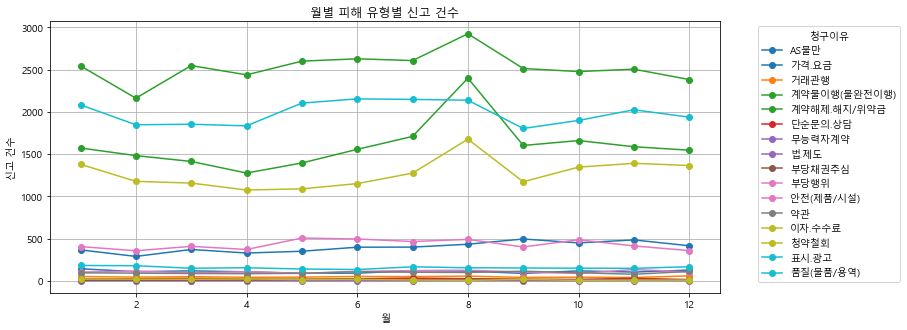

In [72]:
month_reason = df.groupby(['월', '청구이유']).size().unstack()

month_reason.plot(kind='line', marker='o', figsize=(12, 5), colormap='tab10')

plt.title('월별 피해 유형별 신고 건수')
plt.xlabel('월')
plt.ylabel('신고 건수')
plt.legend(title='청구이유', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

8월에 급격하게 올라감, 품질관련은 8-9월에 낮아지지만 12-1월에서 올라가는 그래프

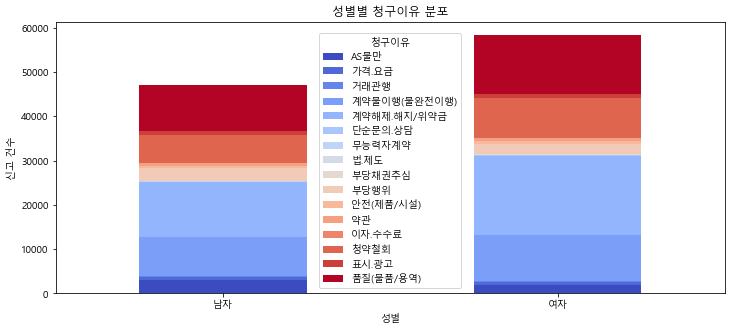

In [74]:
gender_category = df.groupby(['성별', '청구이유']).size().unstack()

# 시각화
gender_category.plot(kind='bar', stacked=True, figsize=(12, 5), colormap='coolwarm')

plt.title('성별별 청구이유 분포')
plt.xlabel('성별')
plt.ylabel('신고 건수')
plt.legend(title='청구이유')
plt.xticks(rotation=0)
plt.show()

전체적으로 여자가 남자보다 모든 항목이 높은 수치를 보여줌

<AxesSubplot:>

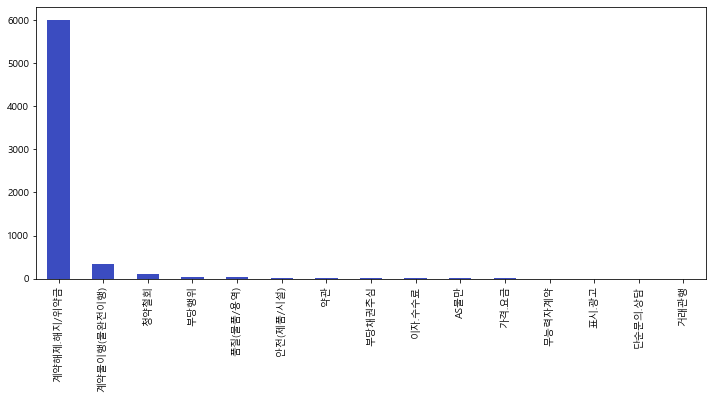

In [77]:
contract_issues = df[df['물품소분류'] == '헬스장']['청구이유'].value_counts()
contract_issues.plot(kind='bar', figsize=(12, 5), colormap='coolwarm')